<h1>Lesson 1. kNN on Iris dataset</h1>

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px; height:200px;"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
</table>
  
  <p>This exercise relates to the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">iris data set</a>,
which contains the morphologic variation of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor).</p>
<p>Four features were measured from each observation (see image above):</p>
<ul>
<li>Sepal.Length - sepal length in centimeters</li>
<li>Sepal.Width - sepal width in centimeters</li>
<li>Petal.Length - petal length in centimeters</li>
<li>Petal.Width - petal width in centimeters</li>
<li>Species - species of the flower (our outcome variable)</li>
</ul>
<p>scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.</p>
<p>You can check the documentation <a href="http://scikit-learn.org/stable/datasets/index.html">here</a></p>
<p>This dataset is built in under variable 'iris'. Let's see how it looks:</p>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

iris = load_iris()

<h3>Q.0.1 Print the object type of iris</h3>

In [2]:
# Put the command (or commands) here that would give the answer to the above question.
#TODO --> DONE
print(type(iris))
iris?

<class 'sklearn.utils.Bunch'>


<p>
Answer:
    
Bunch: Container object for datasets. Dictionary-like object that exposes its keys as attributes.
</p>

In [3]:
print(list(iris.target_names))

['setosa', 'versicolor', 'virginica']


<h3>Q.0.2 What do the iris.target_names represent</h3>

In [4]:
# Describe what the iris.target_names represent
#TODO --> DONE

<p>
Answer:
    
The isis.target_names is an array of the unique species that the model categorizes the data to.
</p>

In [5]:
print(list(iris.feature_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<h3>Q.0.3 What do the iris.feature_names represent</h3>

In [6]:
# Describe what the iris.feature_names represent
#TODO --> DONE

<p>
Answer: 
    
The iris.feature_names is an array containing the dataset input names. 
Each input has an array of a specific quantified measurement.
</p>

In [7]:
# print the integers representing the species of each observation
print (iris.target)
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['label'] = iris.target
data.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3>Q.1. How many observations are present for each species?</h3>

In [8]:
# Put the command (or commands) here that would give an answer to the above question.
#TODO --> DONE
pd.value_counts(data.label)

2    50
1    50
0    50
Name: label, dtype: int64

<p>
The dataset contains 50 observations for each species.    
</p>

<h3>Q.2. Plot the Sepal.Width vs. Sepal.Length, Petal.Width vs. Petal.Length, while color-coding the species.</h3> 

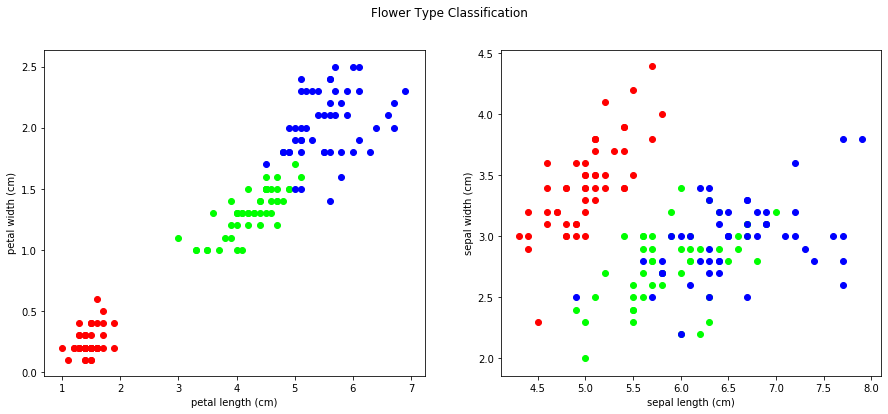

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig,axs = plt.subplots(1,2,figsize=(15,6))
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
colors = ['#FF0000', '#00FF00', '#0000FF']

for name,group in data.groupby('label'):
    axs[0].scatter(group['petal length (cm)'], group['petal width (cm)'], c=colors[int(name)])
    axs[1].scatter(group['sepal length (cm)'], group['sepal width (cm)'], c=colors[int(name)])

fig.suptitle('Flower Type Classification')
axs[0].set_xlabel('petal length (cm)')
axs[0].set_ylabel('petal width (cm)')
axs[1].set_xlabel('sepal length (cm)')
axs[1].set_ylabel('sepal width (cm)')
plt.show();

<h3>Q.3. Which of the plots allows for easier determination of the flower type?</h3>

In [ ]:
# Identify the plot that clearly separates the classes
#TODO


<br>
<p>After the initial exploratory data analysis.</p>

<h3>Q.4. Write the command to split the data into 70% train and 30% test, to prepare for k-NN modelling:</h3>

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split?

In [ ]:
from sklearn.model_selection import train_test_split

# first split the dataset into its attributes and labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, 4].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<h3>Q.5. Write the Python command that performs k-NN fit using Petal.Width and Petal.Length only using 2 neighbors.</h3>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
#TODO --> DONE
clf = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
#TODO
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

<h3>Q.6. Evaluate your algorithm using the confusion_matrix and classification_report methods of the sklearn.metrics</h3>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
classification_report?
#confusion_matrix?

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#TODO
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred)) 
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

<h3>Q.7. What accuracy did you obtain?</h3>

In [ ]:
print(accuracy_score(y_test, y_pred))

<h3>Q.8. Try with different values of k (3 and 5), do you observe any difference in your result? Explain.</h3>

In [ ]:
# Instantiate learning model (k = 5)
#TODO --> DONE
clf = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
#TODO --> DONE
clf.fit(X_train, y_train)

# Predicting the Test set results
#TODO --> DONE
y_pred = clf.predict(X_test)

#TODO --> DONE
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred)) 
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))
print(f'\nAccuracy: {accuracy_score(y_test, y_pred)}')

<p>
Answer: 

I observe a small decrease in all metrics for the 5 group kNN. This should be expected since it's a supervised model and there are a maximum of 3 identified species. 5 groups means that some species could have 2 groups and doesn't always fit perfectly
</p>

<h3>Q.9. List three methods that can be used to improve prediction quality</h3>

In [ ]:
# 1. Choosing the most applicable set of variables
# 2. Choosing an optimal value for k for kNN
# 3. Not overfitting the data in general

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

<p>
Answer:

This week's learning was a great refresher for me. I have gone through a similar excercise with this same dataset. I greatly appreciated the lesson in tradeoffs between accuracy, precision, and recall. I also like the polls/quizes after a section because it locks in my understanding.
</p>